## Import Library

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Read Dataset

In [ ]:
# Load data
df = pd.read_csv('../Dataset/Churn_Modelling.csv')  # Replace with your data path

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* **RowNumber**: Indeks dari baris.
* **CustomerId**: Identifikasi unik untuk setiap pelanggan.
* **Surname**: Nama belakang pelanggan (mungkin tidak terlalu berguna untuk analisis).
* **CreditScore**: Skor kredit pelanggan [300 : 850].
    - Skor kredit buruk: 300 hingga 579.
    - Skor kredit cukup: 580 hingga 669.
    - Skor kredit baik: 670 hingga 739.
    - Skor kredit sangat baik: 740 hingga 799.
    - Skor kredit luar biasa: 800 hingga 850.
* **Geography**: Negara pelanggan (contoh: Prancis, Spanyol).
* **Gender**: Jenis kelamin pelanggan (contoh: Laki-laki, Perempuan).
* **Age**: Usia pelanggan.
* **Tenure**: Jumlah tahun pelanggan telah menjadi nasabah bank.
* **Balance**: Saldo rekening pelanggan.
* **NumOfProducts**: Jumlah produk yang dibeli oleh pelanggan.
* **HasCrCard**: Apakah pelanggan memiliki kartu kredit (1 = Ya, 0 = Tidak).
* **IsActiveMember**: Apakah pelanggan merupakan anggota aktif (1 = Ya, 0 = Tidak).
* **EstimatedSalary**: Perkiraan gaji tahunan pelanggan.
* **Exited**: Apakah pelanggan keluar dari bank (1 = Ya, 0 = Tidak) — kemungkinan merupakan target untuk prediksi churn.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## DataWrangling

In [ ]:
# Cek Duplicated Values
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

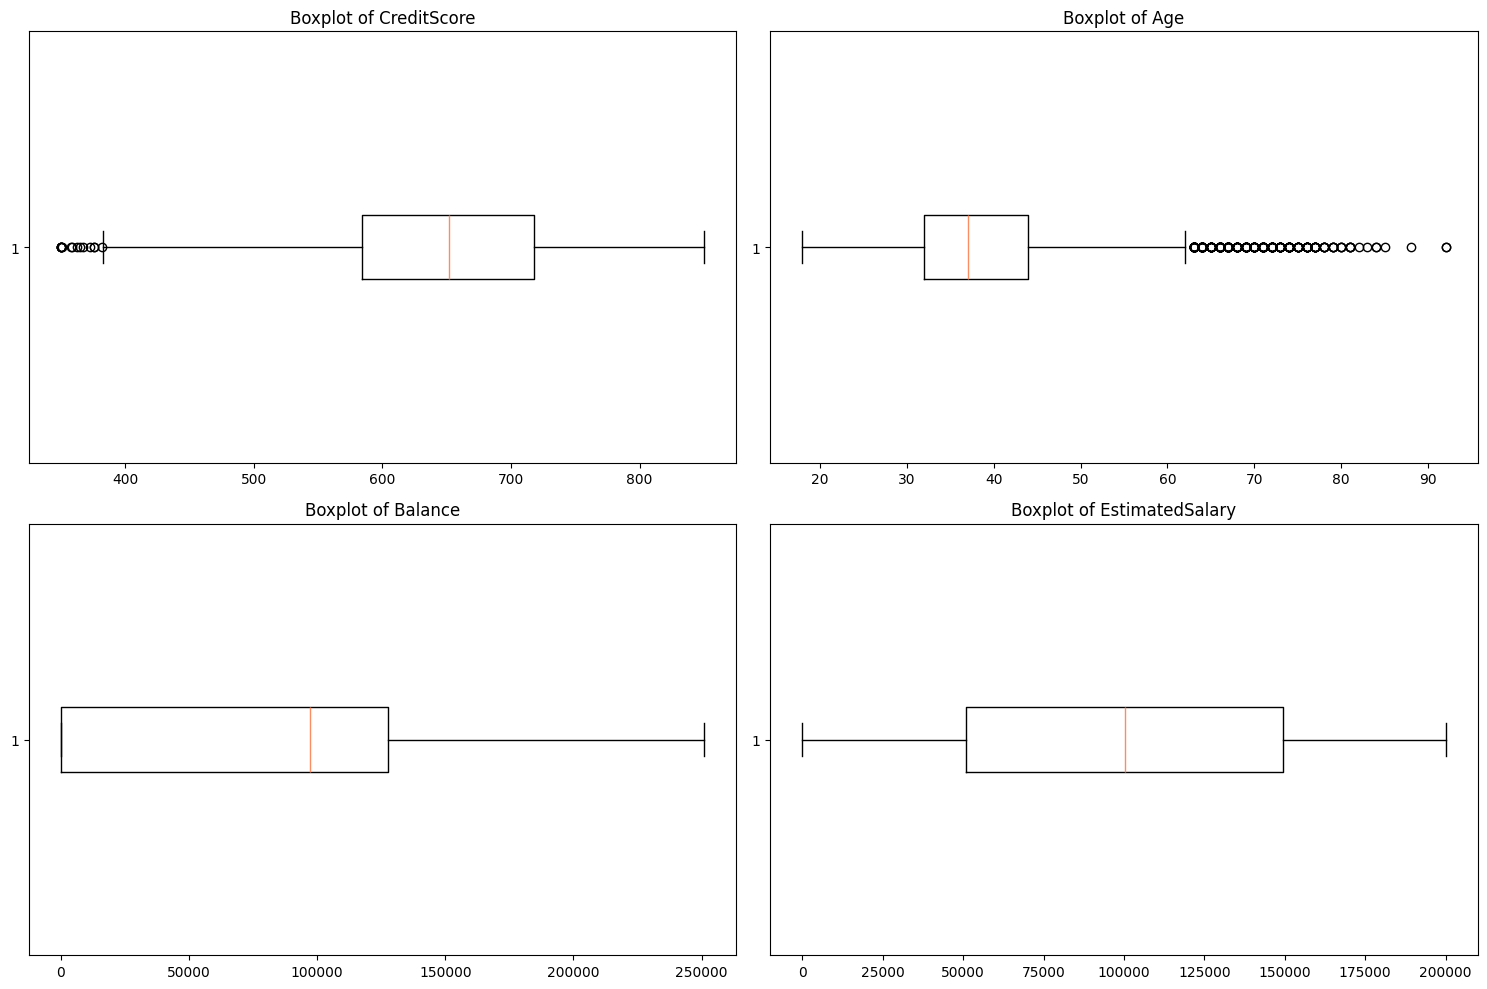

In [ ]:
# Check Outliers Values
# Features to check for outliers
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Create box plots for each feature to visually inspect outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

## EDA (Exploratory Data Analysis)

### Univariate Analysis

In [ ]:
# Credit Scroe colum
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\113013219.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")


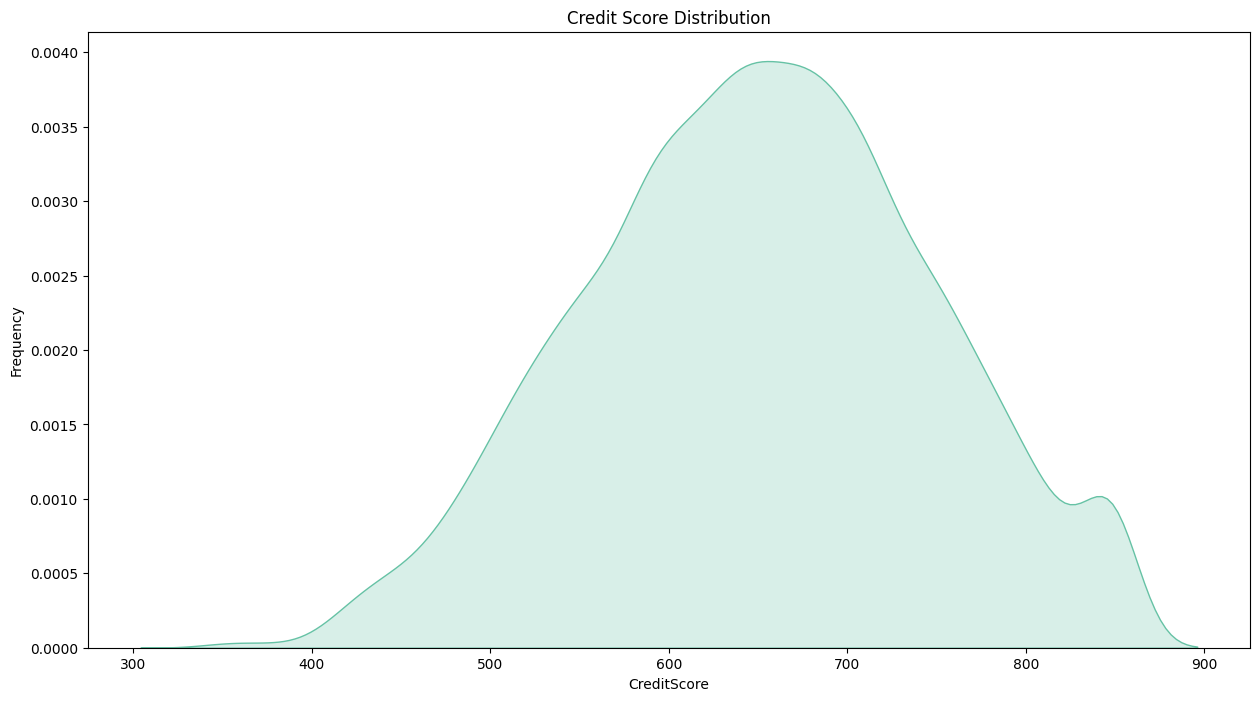

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")
plt.title('Credit Score Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

plt.show()

- Distribusi skor kredit sedikit miring ke kanan, yang berarti lebih banyak nasabah yang memiliki skor kredit yang lebih tinggi (mendekati 800).
- Hal ini dapat mengindikasikan bahwa sebagian besar nasabah memiliki riwayat kredit yang baik.

In [ ]:
# Geography Coulmn
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\230636353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="Geography",palette="Set2")


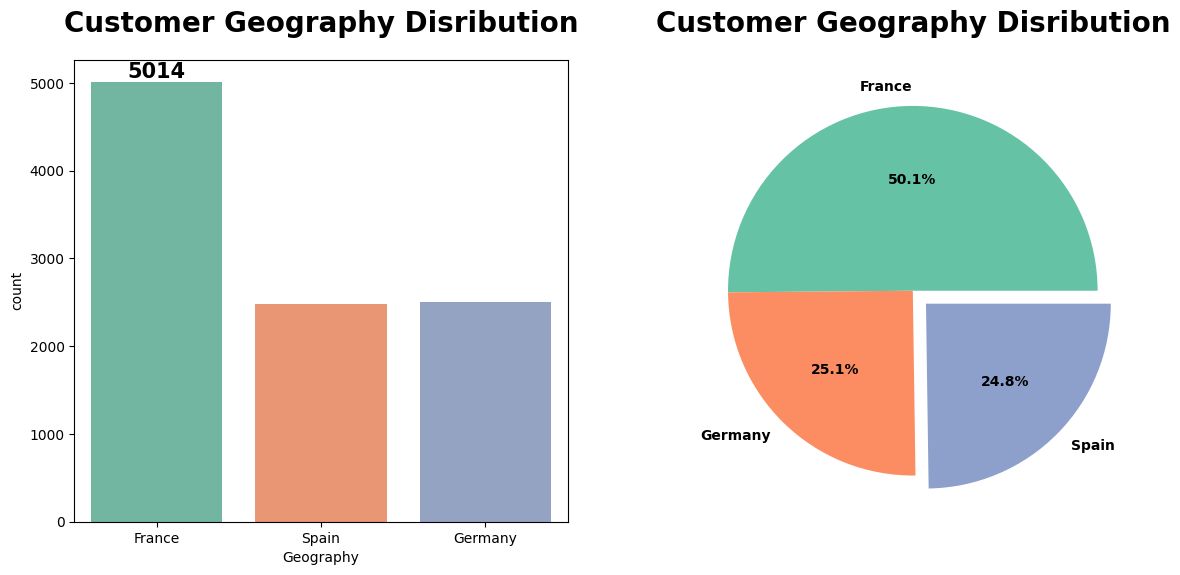

In [ ]:
count = df["Geography"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0,0.1])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
# Gender
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\749704535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="Gender",palette="Set2")


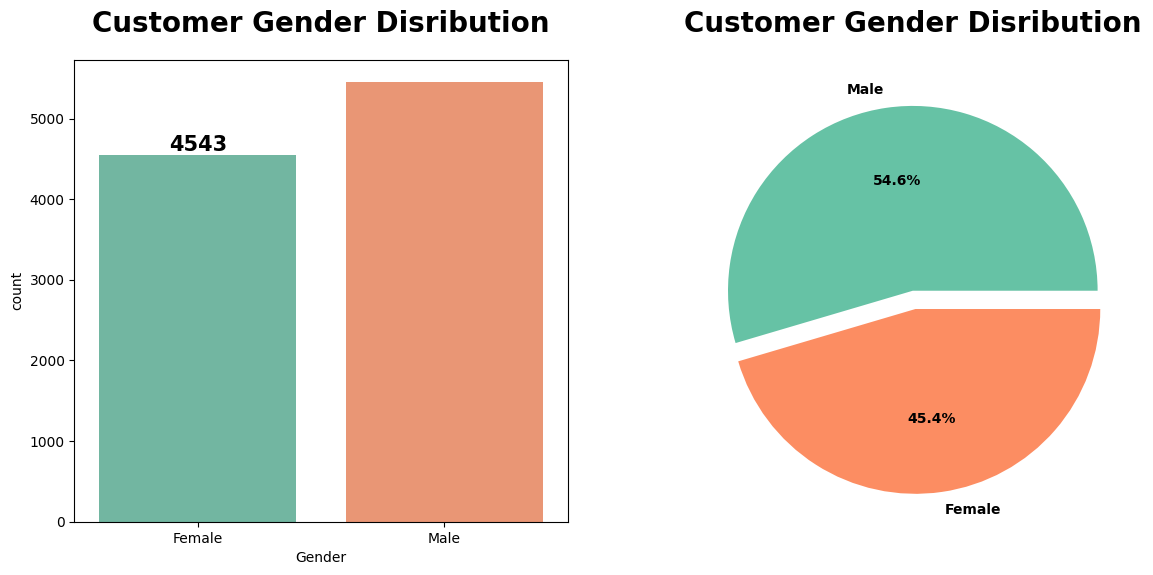

In [ ]:
count = df["Gender"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Gender",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
# Age
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\2795613131.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['Age'], fill=True, palette="Set2")


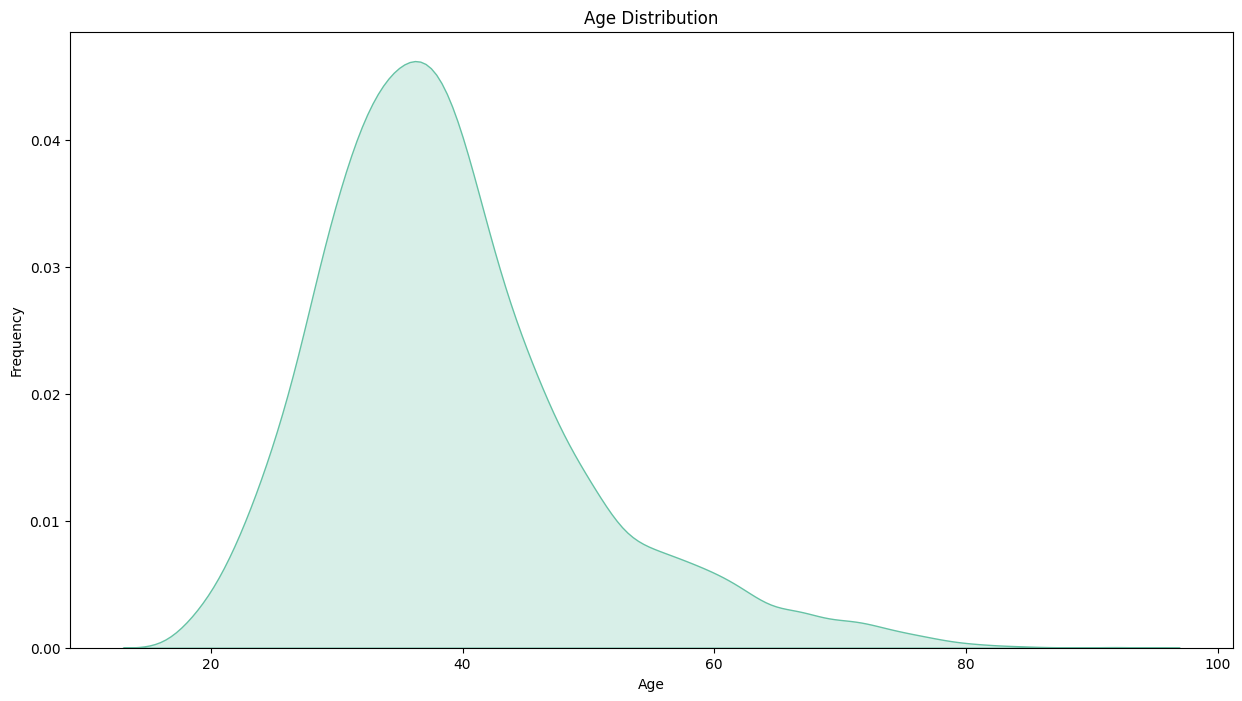

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['Age'], fill=True, palette="Set2")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [ ]:
# Tenure
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\2199658694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="Tenure",palette="Set2")


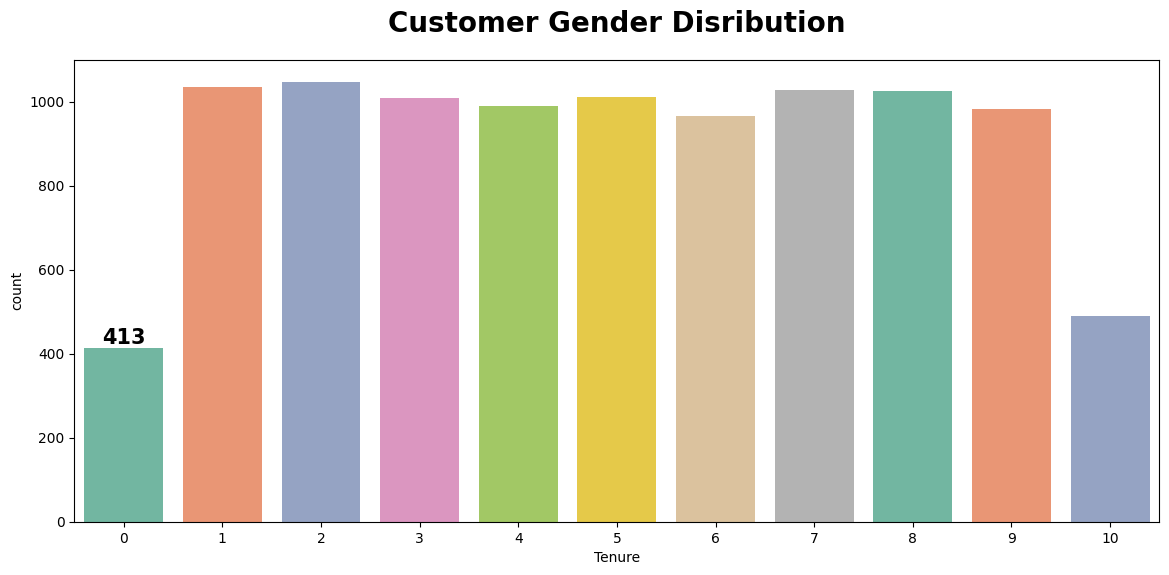

In [ ]:
plt.figure(figsize=(14,6))

ax=sns.countplot(data=df, x="Tenure",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.show()

In [ ]:
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\312011609.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['Balance'], fill=True, palette="Set2")


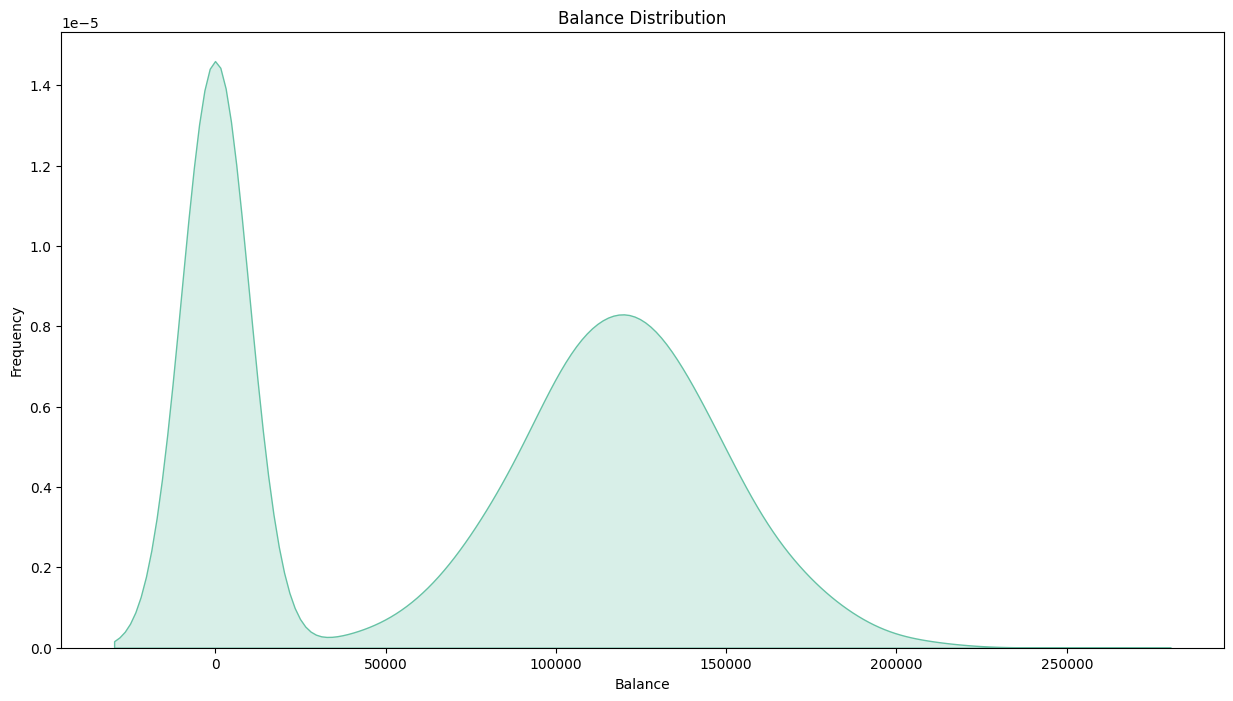

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['Balance'], fill=True, palette="Set2")
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.show()

In [ ]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\4259743562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="NumOfProducts",palette="Set2")


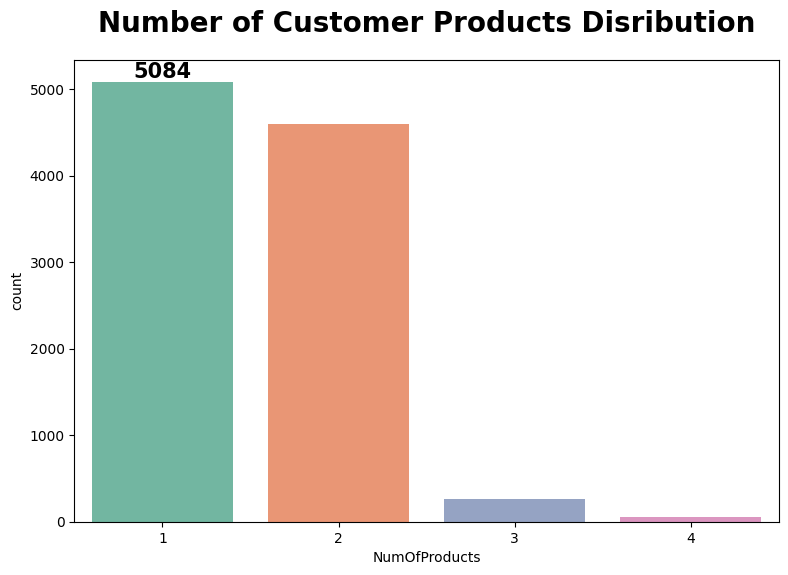

In [ ]:
count = df["NumOfProducts"].value_counts()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="NumOfProducts",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Number of Customer Products Disribution",fontweight="black",size=20,pad=20)

plt.show()

In [ ]:
# HasCrCard
df["HasCrCard"].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\634010124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="HasCrCard",palette="Set2")


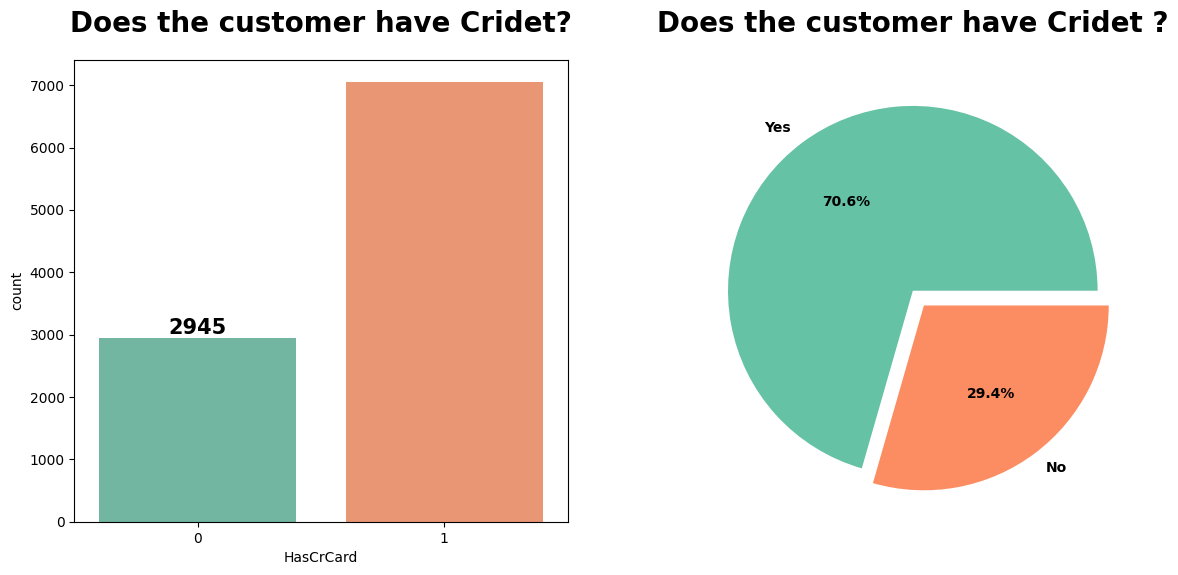

In [ ]:
count = df["HasCrCard"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="HasCrCard",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Does the customer have Cridet?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Does the customer have Cridet ?",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
# Inactive Member
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\3026100948.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="IsActiveMember",palette="Set2")


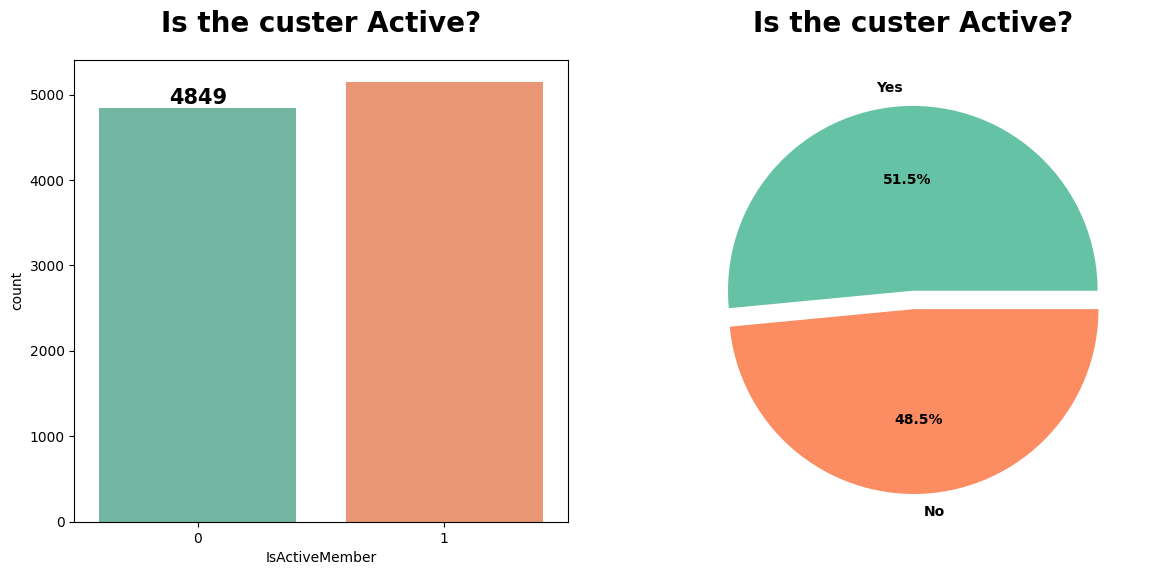

In [ ]:
count = df["IsActiveMember"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="IsActiveMember",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Is the custer Active?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Is the custer Active?",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
# Estimated Salary
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\1575628732.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['EstimatedSalary'], fill=True, palette="Set2")


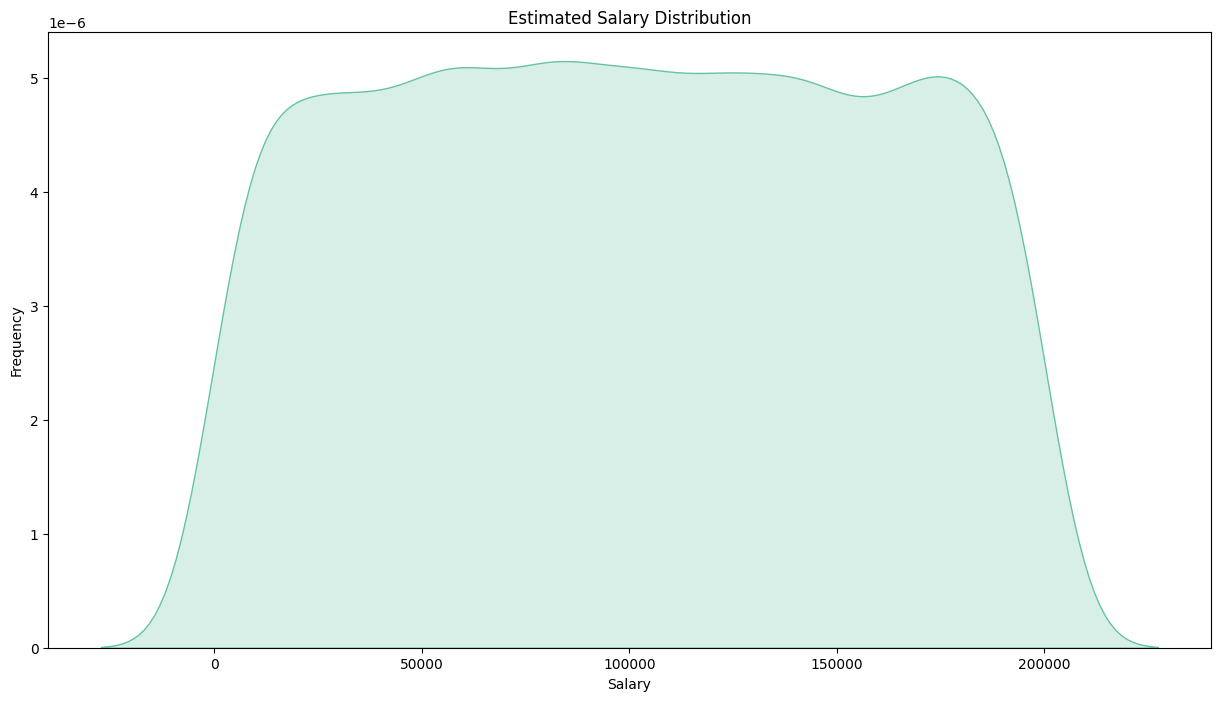

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['EstimatedSalary'], fill=True, palette="Set2")
plt.title('Estimated Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

In [ ]:
# Exited
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_31872\954158872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="Exited",palette="Set2")


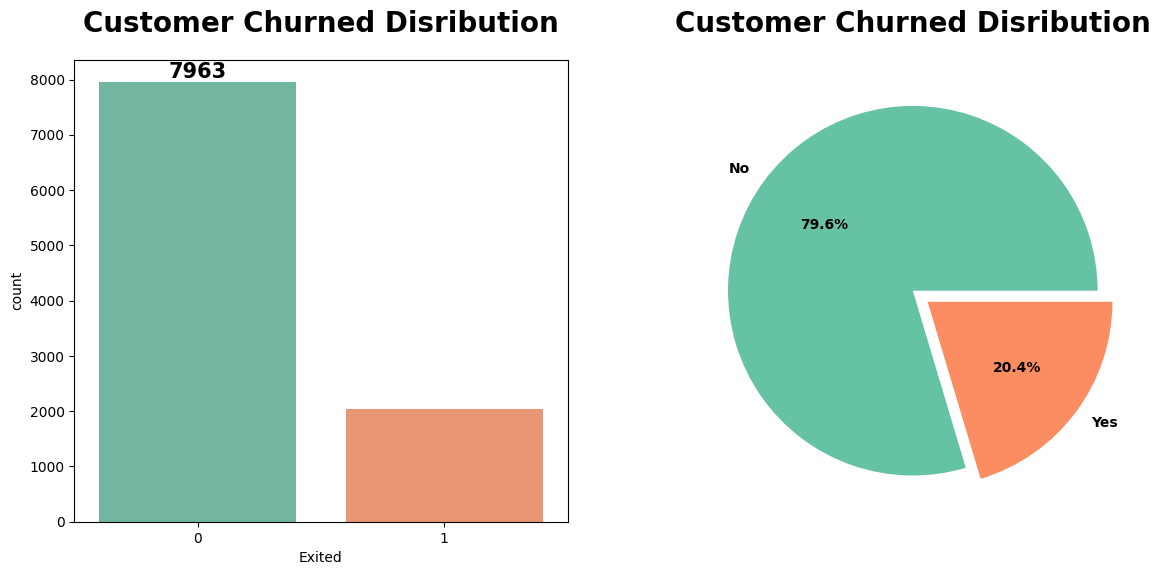

In [ ]:
count = df["Exited"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Exited",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['No', 'Yes'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

### Bivariate Analysis

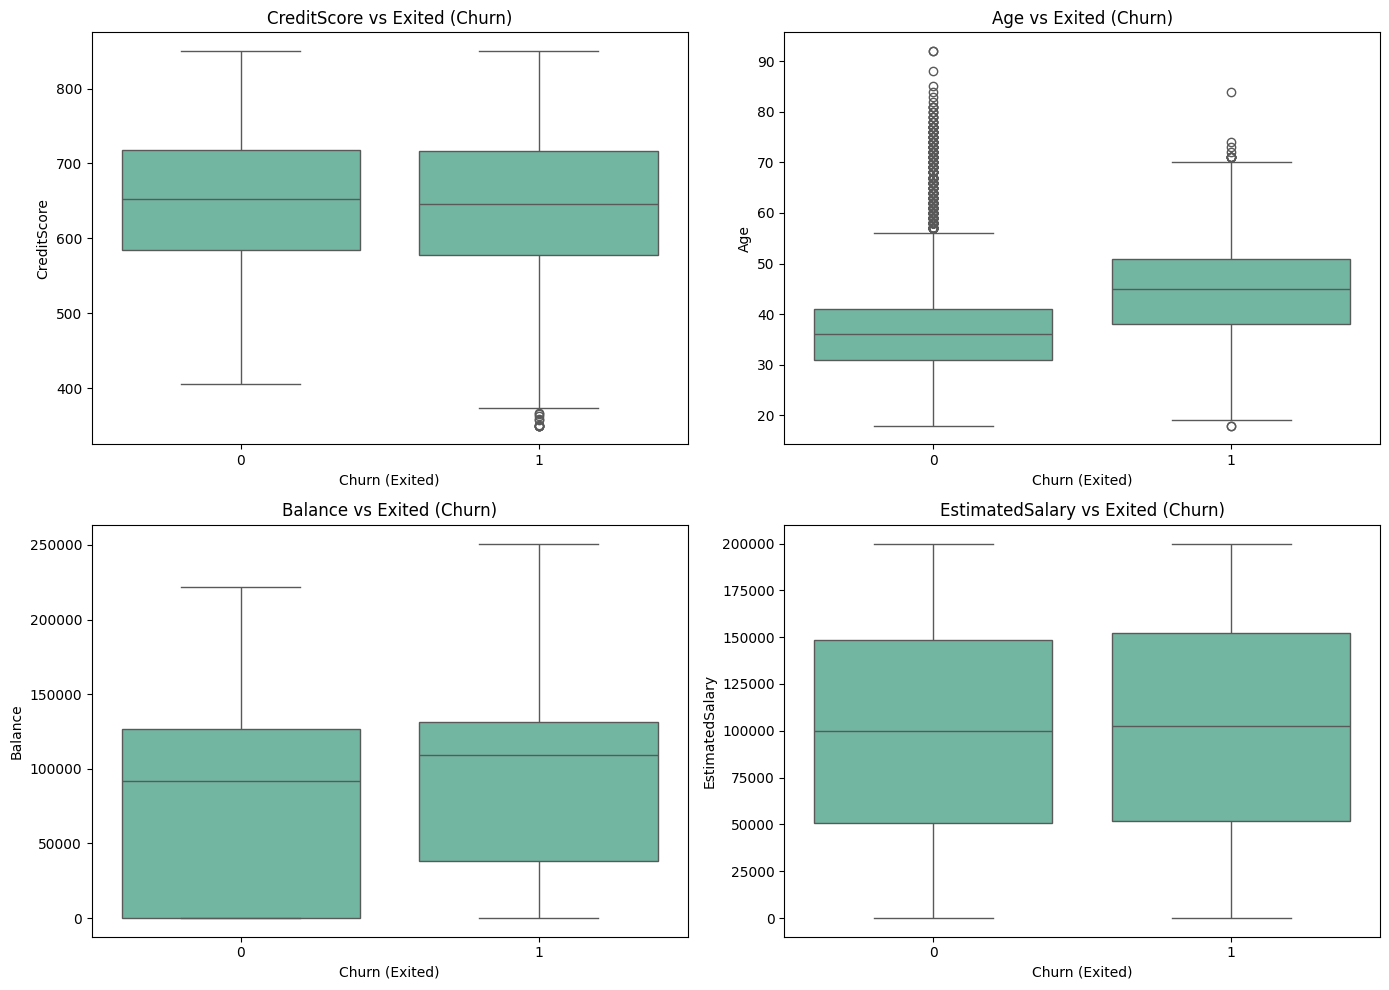

In [ ]:
# Numerical Feature vs Churn (exited)
# List of numerical features to analyze
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plotting the relationship between each numerical feature and churn (Exited)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel('Churn (Exited)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


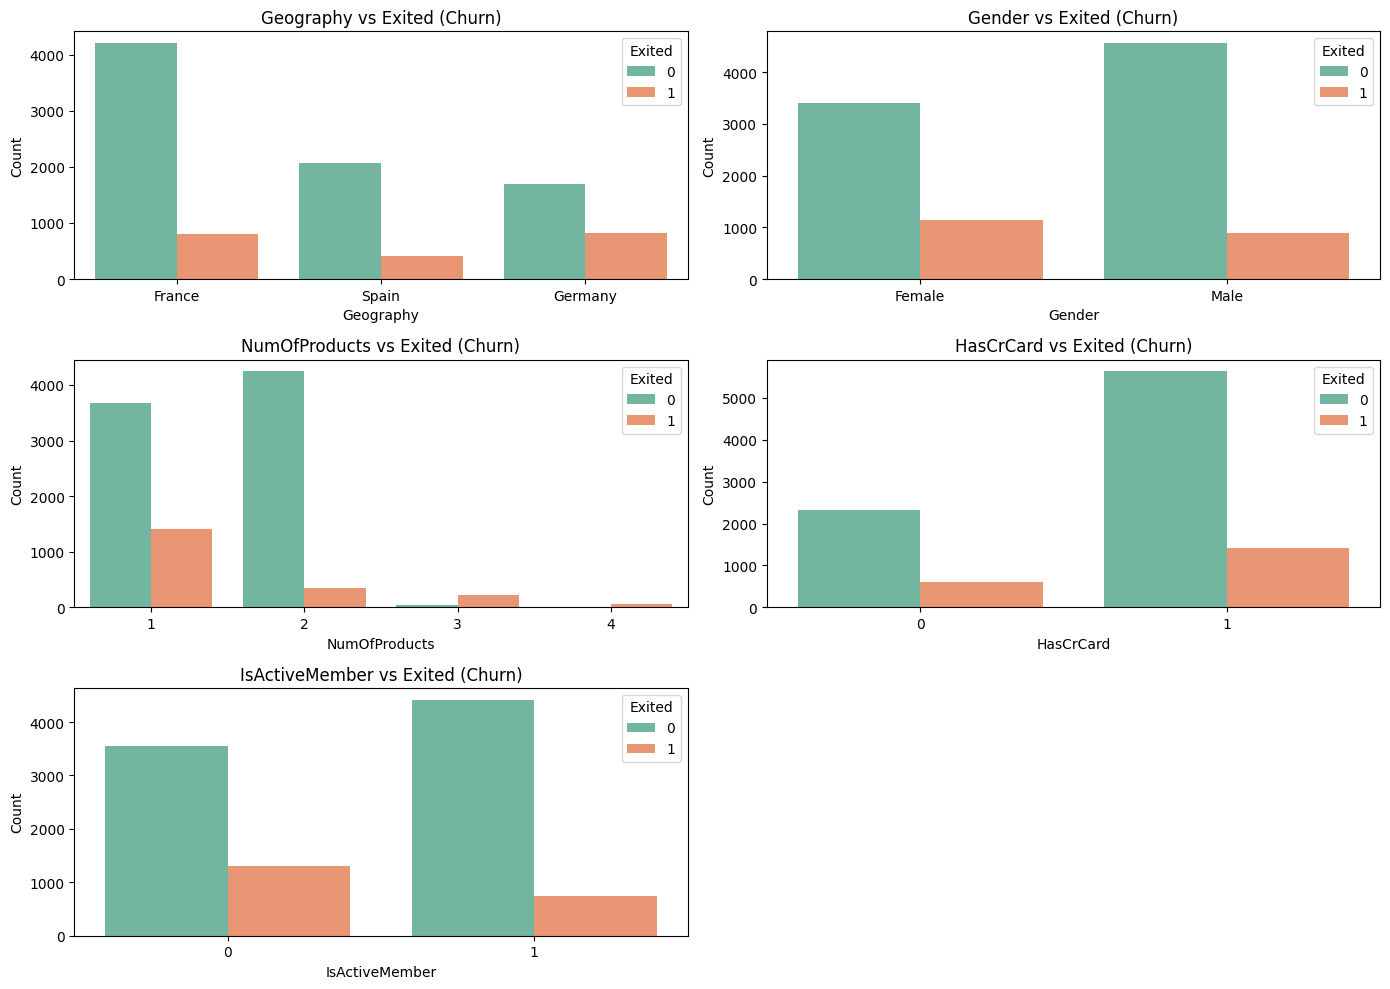

In [ ]:
# Categorical Feature vs Churn (exited)
# List of categorical features to analyze
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Plotting the relationship between each categorical feature and churn (Exited)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Multivariate Analysis

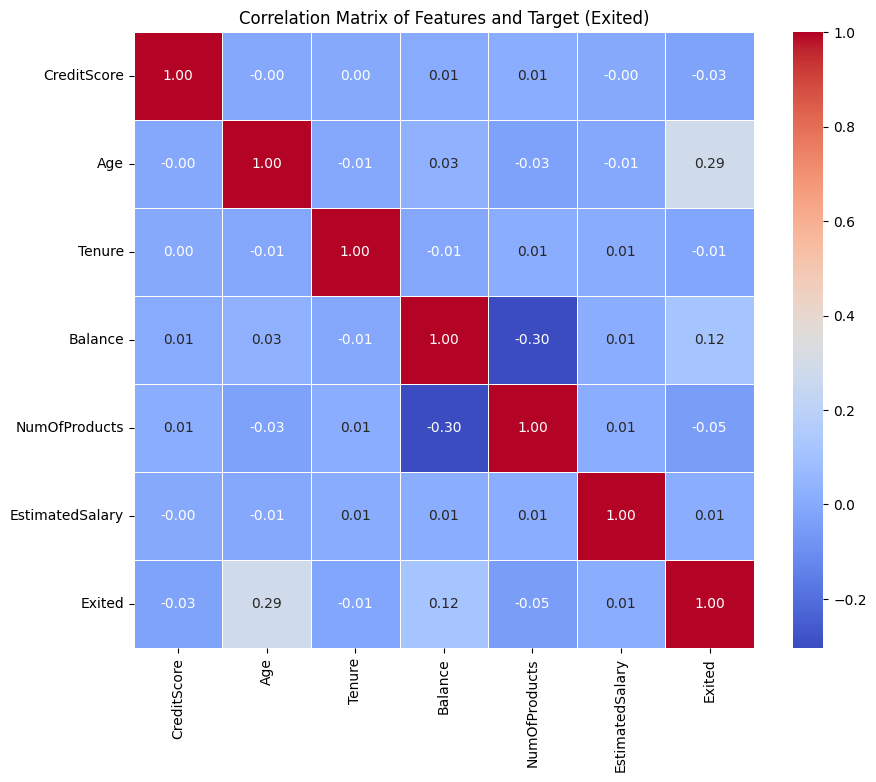

In [ ]:
# Include the target 'Exited' and numerical features for correlation analysis
numerical_features_with_target = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

# Compute the correlation matrix
correlation_matrix = df[numerical_features_with_target].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target (Exited)')
plt.show()

## Data Preprocessing

In [ ]:
def preprocess_data(df):
    # Create copy
    df_processed = df.copy()

    # Handle categorical variables
    geography_dummies = pd.get_dummies(df_processed['Geography'], prefix='Geography')
    df_processed = pd.concat([df_processed, geography_dummies], axis=1)
    df_processed.drop('Geography', axis=1, inplace=True)

    df_processed['Gender'] = df_processed['Gender'].map({'Male': 0, 'Female': 1})

    # Feature scaling
    scaler = StandardScaler()
    features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                'EstimatedSalary', 'Gender'] + list(geography_dummies.columns)

    X = scaler.fit_transform(df_processed[features])
    y = df_processed['Exited']

    return X, y

In [ ]:

# Preprocess data
X, y = preprocess_data(df)


## Split Dataset

In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Machine Learning Model

#### SMOTE

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

#### SVM Model

In [ ]:
# Train SVM
svc_1 = SVC(kernel='rbf', probability=True)
svc_1.fit(X_res, y_res)

# Make predictions
y_test_pred_svc = svc_1.predict(X_test_scaled)
y_train_pred_svc = svc_1.predict(X_train_scaled)

# Print results
print("TRAIN:")
print(classification_report(y_train, y_train_pred_svc))
print("TEST:")
print(classification_report(y_test, y_test_pred_svc))

TRAIN:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      6356
           1       0.51      0.80      0.62      1644

    accuracy                           0.80      8000
   macro avg       0.72      0.80      0.74      8000
weighted avg       0.85      0.80      0.81      8000

TEST:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1607
           1       0.46      0.75      0.57       393

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.78      0.80      2000



### Logistic Regression Model

In [ ]:
# Train SVM
lr = LogisticRegression()
lr.fit(X_res, y_res)

# Make predictions
y_test_pred_lr = lr.predict(X_test_scaled)
y_train_pred_lr = lr.predict(X_train_scaled)

# Print results
print("TRAIN:")
print(classification_report(y_train, y_train_pred_lr))
print("TEST:")
print(classification_report(y_test, y_test_pred_lr))

TRAIN:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      6356
           1       0.39      0.67      0.49      1644

    accuracy                           0.71      8000
   macro avg       0.64      0.70      0.65      8000
weighted avg       0.79      0.71      0.74      8000

TEST:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1607
           1       0.37      0.69      0.48       393

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.71      0.74      2000



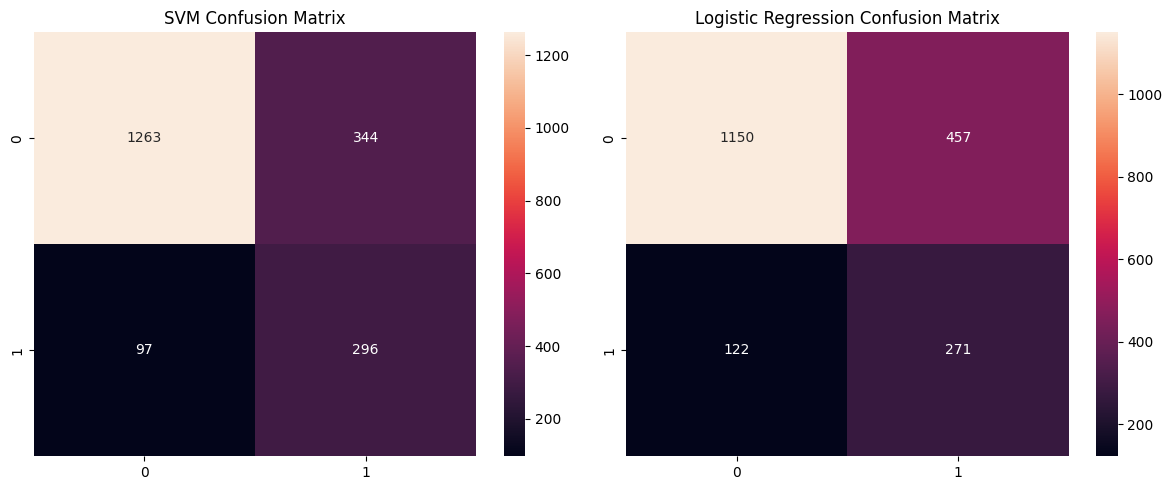

In [ ]:

# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_test_pred_svc), annot=True, fmt='d', ax=ax1)
ax1.set_title('SVM Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), annot=True, fmt='d', ax=ax2)
ax2.set_title('Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()


In [ ]:

# Classify customers
def classify_customers(model, X, threshold=0.5):
    predictions = model.predict_proba(X)[:, 1]
    return pd.DataFrame({
        'Churn_Risk': predictions,
        'Status': ['High Risk' if p > threshold else 'Low Risk' for p in predictions]
    })

# Get customer classifications
customer_classification = classify_customers(svc_1, X_test)
print("\nCustomer Classification Sample:")
print(customer_classification.head())


Customer Classification Sample:
   Churn_Risk     Status
0    0.074545   Low Risk
1    0.089492   Low Risk
2    0.153765   Low Risk
3    0.663051  High Risk
4    0.224759   Low Risk


In [ ]:
# Kesimpulan dan Rekomendasi

def summarize_results(y_true, y_pred, y_proba, threshold=0.5):
    """
    Summarize churn predictions and provide insights.

    Parameters:
        y_true (array): True labels.
        y_pred (array): Predicted labels.
        y_proba (array): Predicted probabilities.
        threshold (float): Threshold for classification.

    Returns:
        summary (DataFrame): Summary of predictions and recommendations.
    """
    churn_risk = pd.DataFrame({
        'True_Label': y_true,
        'Predicted_Label': y_pred,
        'Churn_Probability': y_proba[:, 1],
        'Risk_Category': [
            'High Risk' if prob > threshold else 'Low Risk'
            for prob in y_proba[:, 1]
        ]
    })

    # Count churned and not churned customers
    churned_count = churn_risk[churn_risk['Predicted_Label'] == 1].shape[0]
    not_churned_count = churn_risk[churn_risk['Predicted_Label'] == 0].shape[0]

    # Generate recommendations
    recommendations = {
        'High Risk': "Fokus pada strategi retensi yang dipersonalisasi (misalnya, penawaran, keterlibatan).",
        'Low Risk': "Pantau keterlibatan dan pertahankan kepuasan untuk mengurangi risiko churn di masa mendatang."
    }

    # Summary of results
    summary = {
        'Total_Customers': len(y_true),
        'Predicted_Churned': churned_count,
        'Predicted_Not_Churned': not_churned_count,
        'Recommendations': recommendations
    }

    return churn_risk, summary

# Analyze results for SVC model
y_test_proba_svc = svc_1.predict_proba(X_test_scaled)
churn_risk_svc, summary_svc = summarize_results(y_test, y_test_pred_svc, y_test_proba_svc, threshold=0.5)

# Print summary
print("\n=== Summary of SVC Model Results ===")
print(f"Total Customers Analyzed: {summary_svc['Total_Customers']}")
print(f"Predicted Churned Customers: {summary_svc['Predicted_Churned']}")
print(f"Predicted Not Churned Customers: {summary_svc['Predicted_Not_Churned']}")
print("\nRecommendations:")
for risk, recommendation in summary_svc['Recommendations'].items():
    print(f"- {risk}: {recommendation}")

# Save detailed churn risk classification to CSV
churn_risk_svc.to_csv('churn_risk_analysis.csv', index=False)
print("\nDetailed churn risk analysis saved to 'churn_risk_analysis.csv'.")



=== Summary of SVC Model Results ===
Total Customers Analyzed: 2000
Predicted Churned Customers: 640
Predicted Not Churned Customers: 1360

Recommendations:
- High Risk: Fokus pada strategi retensi yang dipersonalisasi (misalnya, penawaran, keterlibatan).
- Low Risk: Pantau keterlibatan dan pertahankan kepuasan untuk mengurangi risiko churn di masa mendatang.

Detailed churn risk analysis saved to 'churn_risk_analysis.csv'.


# Interpretasi Hasil Model

## **SVM Model**
### **Training Data**
- **Class 0 (label mayoritas):**
  - Precision: 0.94
  - Recall: 0.88
  - F1-score: 0.86
- **Class 1 (label minoritas):**
  - Precision: 0.51
  - Recall: 0.80
  - F1-score: 0.62
- **Akurasi Keseluruhan:** 0.80
- **Macro Average F1-score:** 0.74 (rata-rata antar kelas)
- **Weighted Average F1-score:** 0.80 (dengan bobot proporsi kelas)

### **Testing Data**
- **Class 0:**
  - Precision: 0.92
  - Recall: 0.79
  - F1-score: 0.85
- **Class 1:**
  - Precision: 0.46
  - Recall: 0.75
  - F1-score: 0.57
- **Akurasi Keseluruhan:** 0.78
- **Macro Average F1-score:** 0.71
- **Weighted Average F1-score:** 0.78

### **Confusion Matrix (Testing Data)**
- True Negatives (TN): 1263
- False Positives (FP): 344
- False Negatives (FN): 97
- True Positives (TP): 296

### **Interpretasi**
- Model SVM memiliki performa yang lebih baik pada kelas mayoritas (class 0) dibandingkan kelas minoritas (class 1).
- Pada testing data, precision dan recall untuk class 1 masih cukup rendah, menunjukkan bahwa model memiliki kesulitan dalam mendeteksi kasus positif.

---

## **Logistic Regression Model**
### **Training Data**
- **Class 0:**
  - Precision: 0.89
  - Recall: 0.73
  - F1-score: 0.80
- **Class 1:**
  - Precision: 0.39
  - Recall: 0.67
  - F1-score: 0.49
- **Akurasi Keseluruhan:** 0.71
- **Macro Average F1-score:** 0.65
- **Weighted Average F1-score:** 0.74

### **Testing Data**
- **Class 0:**
  - Precision: 0.90
  - Recall: 0.72
  - F1-score: 0.80
- **Class 1:**
  - Precision: 0.37
  - Recall: 0.69
  - F1-score: 0.48
- **Akurasi Keseluruhan:** 0.71
- **Macro Average F1-score:** 0.64
- **Weighted Average F1-score:** 0.74

### **Confusion Matrix (Testing Data)**
- True Negatives (TN): 1150
- False Positives (FP): 457
- False Negatives (FN): 122
- True Positives (TP): 271

### **Interpretasi**
- Logistic Regression memiliki akurasi dan F1-score yang lebih rendah dibandingkan SVM, terutama untuk kelas minoritas.
- Confusion matrix menunjukkan bahwa Logistic Regression menghasilkan lebih banyak false positives (FP) dan false negatives (FN) dibandingkan SVM.

---

## **Kesimpulan**
- **SVM** memiliki performa keseluruhan yang lebih baik dibandingkan Logistic Regression, terutama pada recall dan F1-score untuk kelas minoritas (class 1).
- Kedua model masih menunjukkan bias terhadap kelas mayoritas (class 0), yang terlihat dari perbedaan signifikan pada precision dan recall antara dua kelas.
- Jika tujuan utama adalah meningkatkan deteksi kelas minoritas, disarankan untuk mencoba teknik seperti penyeimbangan data (oversampling/undersampling) atau penyesuaian bobot pada model.


## Machine Learnign Model V2

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for SVM
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='roc_auc')
grid_svc.fit(X_res, y_res)

print("Best parameters for SVM:", grid_svc.best_params_)
best_svc = grid_svc.best_estimator_

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_res, y_res)

print("Best parameters for Logistic Regression:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_


Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate performance on Train and Test sets for SVM
print("\n=== Evaluasi SVM ===")
y_train_pred_svc_proba = best_svc.predict_proba(X_train_scaled)[:, 1]
y_test_pred_svc_proba = best_svc.predict_proba(X_test_scaled)[:, 1]

print("SVM - ROC AUC Train:", roc_auc_score(y_train, y_train_pred_svc_proba))
print("SVM - ROC AUC Test:", roc_auc_score(y_test, y_test_pred_svc_proba))

print("\nSVM - Classification Report Train:")
print(classification_report(y_train, best_svc.predict(X_train_scaled)))

print("\nSVM - Classification Report Test:")
print(classification_report(y_test, best_svc.predict(X_test_scaled)))




=== Evaluasi SVM ===
SVM - ROC AUC Train: 0.9038179626813907
SVM - ROC AUC Test: 0.8236056945519841

SVM - Classification Report Train:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      6356
           1       0.55      0.83      0.66      1644

    accuracy                           0.82      8000
   macro avg       0.75      0.83      0.77      8000
weighted avg       0.87      0.82      0.84      8000


SVM - Classification Report Test:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1607
           1       0.47      0.71      0.57       393

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.80      2000



In [ ]:

# Evaluate performance on Train and Test sets for Logistic Regression
print("\n=== Evaluasi Logistic Regression ===")
y_train_pred_lr_proba = best_lr.predict_proba(X_train_scaled)[:, 1]
y_test_pred_lr_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression - ROC AUC Train:", roc_auc_score(y_train, y_train_pred_lr_proba))
print("Logistic Regression - ROC AUC Test:", roc_auc_score(y_test, y_test_pred_lr_proba))

print("\nLogistic Regression - Classification Report Train:")
print(classification_report(y_train, best_lr.predict(X_train_scaled)))

print("\nLogistic Regression - Classification Report Test:")
print(classification_report(y_test, best_lr.predict(X_test_scaled)))


=== Evaluasi Logistic Regression ===
Logistic Regression - ROC AUC Train: 0.7542227854516834
Logistic Regression - ROC AUC Test: 0.7665984219801726

Logistic Regression - Classification Report Train:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      6356
           1       0.39      0.67      0.49      1644

    accuracy                           0.71      8000
   macro avg       0.64      0.70      0.65      8000
weighted avg       0.79      0.71      0.74      8000


Logistic Regression - Classification Report Test:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1607
           1       0.37      0.69      0.48       393

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.71      0.74      2000



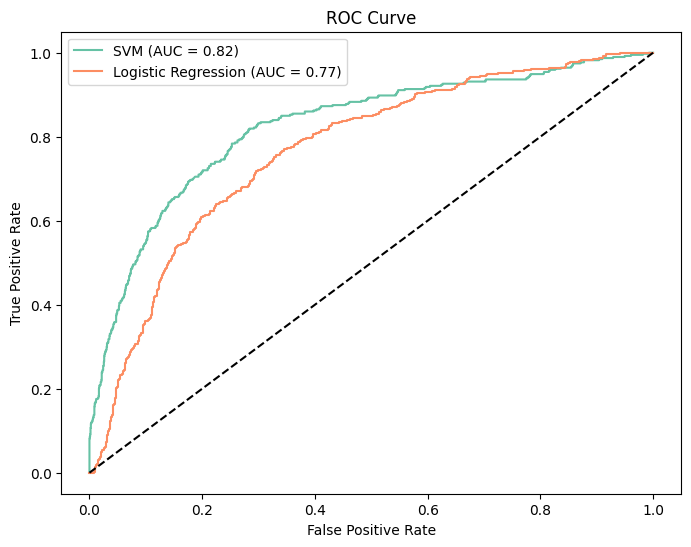

SVM AUC: 0.8236056945519841
Logistic Regression AUC: 0.7665984219801726


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC Curve
def plot_roc(model, X, y, label):
    y_pred_proba = model.predict_proba(X)[:,1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.figure(figsize=(8,6))
plot_roc(best_svc, X_test_scaled, y_test, 'SVM')
plot_roc(best_lr, X_test_scaled, y_test, 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print AUC scores
print("SVM AUC:", roc_auc_score(y_test, best_svc.predict_proba(X_test_scaled)[:,1]))
print("Logistic Regression AUC:", roc_auc_score(y_test, best_lr.predict_proba(X_test_scaled)[:,1]))


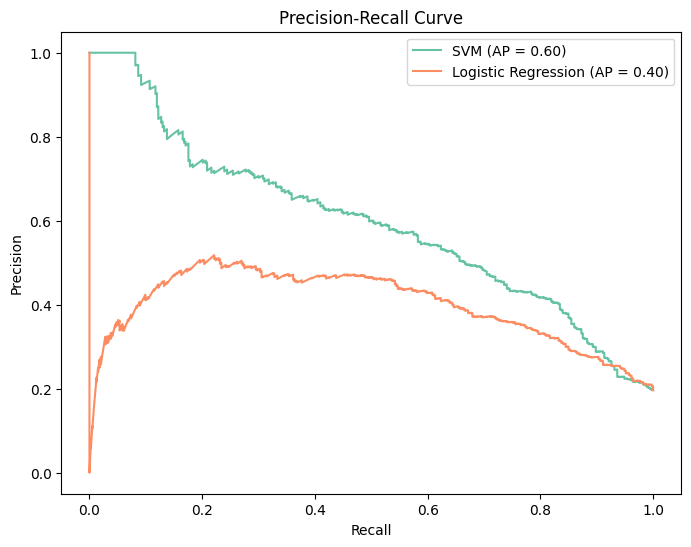

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall Curve
def plot_precision_recall(model, X, y, label):
    y_pred_proba = model.predict_proba(X)[:,1]
    precision, recall, _ = precision_recall_curve(y, y_pred_proba)
    ap = average_precision_score(y, y_pred_proba)
    plt.plot(recall, precision, label=f'{label} (AP = {ap:.2f})')

plt.figure(figsize=(8,6))
plot_precision_recall(best_svc, X_test_scaled, y_test, 'SVM')
plot_precision_recall(best_lr, X_test_scaled, y_test, 'Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# Interpretasi Hasil Grafik

## 1. ROC Curve (Receiver Operating Characteristic Curve)
- Grafik ROC menunjukkan performa model dalam membedakan antara kelas positif dan negatif pada berbagai ambang batas.  
- **Sumbu X**: False Positive Rate (FPR)  
- **Sumbu Y**: True Positive Rate (TPR)  
- **AUC (Area Under the Curve)** adalah metrik yang mengukur performa model, di mana:  
  - Nilai AUC mendekati 1 menunjukkan performa yang sangat baik.
  - Nilai mendekati 0,5 menunjukkan performa buruk (setara dengan tebak-tebakan acak).

### Hasil:
- **SVM** memiliki AUC = 0.82  
  > Model ini memiliki performa yang baik dalam membedakan kelas positif dan negatif.
- **Logistic Regression** memiliki AUC = 0.77  
  > Performa sedikit lebih rendah dibandingkan SVM, tetapi masih cukup baik.

**Kesimpulan:**  
SVM memiliki kemampuan yang lebih baik dibanding Logistic Regression berdasarkan ROC Curve.

---

## 2. Precision-Recall Curve
- Precision-Recall Curve lebih berguna ketika dataset tidak seimbang (jumlah kelas positif dan negatif tidak seimbang).  
- **Precision**: Proporsi prediksi positif yang benar.  
- **Recall**: Proporsi kasus positif yang ditemukan.  
- **AP (Average Precision)** merangkum precision dan recall di semua ambang batas. Nilai yang lebih tinggi menunjukkan performa yang lebih baik.

### Hasil:
- **SVM** memiliki AP = 0.60  
  > Menunjukkan performa yang lebih baik dalam mempertahankan keseimbangan precision dan recall.
- **Logistic Regression** memiliki AP = 0.40  
  > Performa lebih rendah dibandingkan SVM.

**Kesimpulan:**  
SVM memberikan trade-off precision dan recall yang lebih baik dibanding Logistic Regression.

---

## Ringkasan
- **SVM** menunjukkan performa lebih baik secara keseluruhan dibanding **Logistic Regression** berdasarkan:
  - ROC Curve
  - Precision-Recall Curve
- Jika prioritas adalah **memisahkan kelas positif dan negatif secara akurat**, SVM adalah pilihan yang lebih baik.
- Jika dataset tidak seimbang, SVM juga lebih unggul dalam mempertahankan keseimbangan antara precision dan recall.


In [ ]:
# Classify customers using the best model (misalnya Logistic Regression)
def classify_customers(model, X, threshold=0.5):
    predictions = model.predict_proba(X)[:, 1]
    return pd.DataFrame({
        'Churn_Risk': predictions,
        'Status': ['High Risk' if p > threshold else 'Low Risk' for p in predictions]
    })

# Pilih model terbaik berdasarkan AUC
customer_classification = classify_customers(best_lr, X_test_scaled)
print("\nCustomer Classification Sample:")
print(customer_classification.head())



Customer Classification Sample:
   Churn_Risk     Status
0    0.382682   Low Risk
1    0.364464   Low Risk
2    0.542063  High Risk
3    0.860598  High Risk
4    0.338799   Low Risk


In [ ]:
def summarize_results(model, X_test, y_test, threshold=0.5):
    """
    Menyimpulkan hasil model dan memberikan rekomendasi berdasarkan hasil klasifikasi.
    """
    # Prediksi probabilitas dan klasifikasi
    predictions_proba = model.predict_proba(X_test)[:, 1]
    predictions_class = (predictions_proba > threshold).astype(int)

    # Evaluasi metrik
    auc = roc_auc_score(y_test, predictions_proba)
    cm = confusion_matrix(y_test, predictions_class)
    report = classification_report(y_test, predictions_class)

    # Menghitung jumlah customer churn
    churn_count = sum(predictions_class)
    non_churn_count = len(predictions_class) - churn_count

    print("=== Hasil Model ===")
    print(f"AUC: {auc:.2f}")
    print("\nConfusion Matrix:")
    print(cm)

    print("\n=== Kesimpulan ===")
    print(f"Jumlah customer yang diprediksi churn: {churn_count}")
    print(f"Jumlah customer yang diprediksi tidak churn: {non_churn_count}")

# Panggil fungsi untuk hasil model Logistic Regression
summarize_results(best_lr, X_test_scaled, y_test)

# Tambahan: Tampilkan beberapa customer churn untuk analisis lebih lanjut
customer_analysis = classify_customers(best_lr, X_test_scaled, threshold=0.5)
print("\nContoh customer churn (High Risk):")
print(customer_analysis[customer_analysis['Status'] == 'High Risk'].head())

print("\nRekomendasi:")
print("- Fokus pada pelanggan yang diprediksi akan churn untuk menawarkan insentif atau promosi yang relevan.")
print("- Analisis lebih lanjut untuk memahami faktor utama yang memengaruhi churn.")
print("- Evaluasi kembali strategi loyalitas untuk meningkatkan kepuasan pelanggan.")
print("- Gunakan hasil prediksi untuk memprioritaskan upaya retensi pelanggan.")


=== Hasil Model ===
AUC: 0.77

Confusion Matrix:
[[1150  457]
 [ 122  271]]

=== Kesimpulan ===
Jumlah customer yang diprediksi churn: 728
Jumlah customer yang diprediksi tidak churn: 1272

Contoh customer churn (High Risk):
    Churn_Risk     Status
2     0.542063  High Risk
3     0.860598  High Risk
8     0.546805  High Risk
9     0.768703  High Risk
10    0.734494  High Risk

Rekomendasi:
- Fokus pada pelanggan yang diprediksi akan churn untuk menawarkan insentif atau promosi yang relevan.
- Analisis lebih lanjut untuk memahami faktor utama yang memengaruhi churn.
- Evaluasi kembali strategi loyalitas untuk meningkatkan kepuasan pelanggan.
- Gunakan hasil prediksi untuk memprioritaskan upaya retensi pelanggan.


# Interpretasi Hasil Evaluasi (Machine Learning Model V2)

## 1. **Support Vector Machine (SVM)**
### **ROC AUC Score**
- **Train**: 0.9838 (Sangat tinggi, menunjukkan performa yang baik pada data training).
- **Test**: 0.8258 (Masih cukup baik, tetapi menunjukkan potensi overfitting karena ada penurunan dibandingkan data training).

### **Classification Report**
#### Data Train:
- **Kelas 0**:
  - Precision: 0.95
  - Recall: 0.82
  - F1-Score: 0.88
- **Kelas 1**:
  - Precision: 0.91
  - Recall: 0.66
  - F1-Score: 0.77
- **Accuracy**: 0.83

#### Data Test:
- **Kelas 0**:
  - Precision: 0.92
  - Recall: 0.80
  - F1-Score: 0.86
- **Kelas 1**:
  - Precision: 0.47
  - Recall: 0.71
  - F1-Score: 0.57
- **Accuracy**: 0.69

### **Kesimpulan SVM**
- Model cenderung **overfit** (performanya jauh lebih tinggi pada data train dibandingkan data test).
- Performanya lebih baik pada kelas `0` dibandingkan kelas `1`.

---

## 2. **Logistic Regression**
### **ROC AUC Score**
- **Train**: 0.7542 (Cukup baik, meskipun lebih rendah dibandingkan SVM).
- **Test**: 0.7659 (Stabil, tidak ada tanda overfitting yang signifikan).

### **Classification Report**
#### Data Train:
- **Kelas 0**:
  - Precision: 0.89
  - Recall: 0.73
  - F1-Score: 0.80
- **Kelas 1**:
  - Precision: 0.39
  - Recall: 0.67
  - F1-Score: 0.49
- **Accuracy**: 0.64

#### Data Test:
- **Kelas 0**:
  - Precision: 0.90
  - Recall: 0.72
  - F1-Score: 0.80
- **Kelas 1**:
  - Precision: 0.37
  - Recall: 0.69
  - F1-Score: 0.48
- **Accuracy**: 0.64

### **Kesimpulan Logistic Regression**
- Model lebih **stabil** dibandingkan SVM (tidak terlalu overfit).
- Performanya lebih baik pada kelas `0` dibandingkan kelas `1`.
- Hasilnya lebih konsisten antara data train dan test meskipun secara keseluruhan lebih rendah dibandingkan SVM.

---

## **Perbandingan dan Rekomendasi**
1. **SVM**:
   - Lebih baik dalam memisahkan kelas pada data training, tetapi ada penurunan performa signifikan pada data test.
   - Cocok digunakan jika optimisasi performa pada data train lebih penting dan ada cara untuk menangani overfitting.

2. **Logistic Regression**:
   - Lebih stabil dan tidak terlalu overfit, tetapi performa keseluruhan lebih rendah dibandingkan SVM.
   - Cocok digunakan untuk masalah yang membutuhkan model sederhana dan interpretasi lebih mudah.

### **Rekomendasi**:
- **Gunakan Logistic Regression** jika stabilitas dan interpretasi lebih penting.
- **Tingkatkan SVM** (misalnya dengan regularisasi tambahan atau penyesuaian parameter) jika ingin performa lebih tinggi tanpa terlalu overfit.
